In [1]:
# Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Etape à adapter selon le chemin du fichier
# Chargement du fichier
allocine = pd.read_excel(r"C:\Users\maoui\OneDrive\Documents\Data Scientest\DTS - Projet\allocine_dataviz_final.xlsx")
allocine.head()

,ID,titre,titre_original,acteurs,acteur_1,acteur_2,acteur_3,acteur_4,realisateur,real_1,...,date2,annee,jour_split,mois_split,annee_split,actors_score,directors_score,scenaristes_score,distrib_score,budget_dollars
0,270572,Petta,PETTA,"Rajinikanth, Vijay Sethupathi, Nawazuddin Sidd...",Rajinikanth,Vijay Sethupathi,Nawazuddin Siddiqui,Bobby Simha,Karthik Subbaraj,Karthik Subbaraj,...,2019-01-10,2019.0,10.0,1.0,2019.0,0.455621,1.125524,0.141740,0.01495,1.0
1,293378,Les SEGPA,LES SEGPA,"Ichem Bougheraba, Walid Ben Amar, Arriles Amra...",Ichem Bougheraba,Walid Ben Amar,Arriles Amrani,Kader Bueno,"Ali Bougheraba, Hakim Bougheraba",Ali Bougheraba,...,2022-04-20,2022.0,20.0,4.0,2022.0,0.135466,1.055201,0.000000,0.01473,1.0
2,246253,L'Amant D'un Jour,L'AMANT D'UN JOUR,"Eric Caravaca, Esther Garrel, Louise Chevillot...",Eric Caravaca,Esther Garrel,Louise Chevillotte,Felix Kysyl,Philippe Garrel,Philippe Garrel,...,2017-05-31,2017.0,31.0,5.0,2017.0,0.559548,1.983822,0.978035,0.00998,2.0
3,280918,L'Homme parfait,L'HOMME PARFAIT,"Didier Bourdon, Pierre-Francois Martin-Laval, ...",Didier Bourdon,Pierre-Francois Martin-Laval,Valerie Karsenti,Philippe Duquesne,Xavier Durringer,Xavier Durringer,...,2022-06-22,2022.0,22.0,6.0,2022.0,0.632422,1.379569,0.437381,0.01664,4.0
4,310521,Testament,TESTAMENT,"Remy Girard, Sophie Lorain, Marie-Mai, Guylain...",Remy Girard,Sophie Lorain,Marie-Mai,Guylaine Tremblay,Denys Arcand,Denys Arcand,...,2023-11-22,2023.0,22.0,11.0,2023.0,0.459392,1.840676,0.905899,0.02466,6.0


In [2]:
# Vérification du nombre de valeurs manquantes et du type des variables
allocine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       6390 non-null   int64         
 1   titre                    6390 non-null   object        
 2   titre_original           6390 non-null   object        
 3   acteurs                  6018 non-null   object        
 4   acteur_1                 6018 non-null   object        
 5   acteur_2                 5951 non-null   object        
 6   acteur_3                 5898 non-null   object        
 7   acteur_4                 5834 non-null   object        
 8   realisateur              6390 non-null   object        
 9   real_1                   6390 non-null   object        
 10  real_2                   575 non-null    object        
 11  genres                   6390 non-null   object        
 12  genre_1                  6390 non-

In [3]:
# Liste des titres originaux à supprimer (outliers)
films_a_supprimer = ["UN VRAI BONHEUR", "ONG BAK - THE BEGINNING"]

# Filtrer le DataFrame pour exclure les films spécifiés
allocine_budget = allocine[~allocine['titre_original'].isin(films_a_supprimer)]

In [4]:
# Trier les données par la colonne 'budget' dans l'ordre décroissant
top5_budget = allocine_budget.sort_values(by='budget_dollars', ascending=False).head(5)

# Afficher les 5 films avec le plus gros budget
print(top5_budget[['titre', 'budget_dollars']])

                                                titre  budget_dollars
6388                        Avatar : la voie de l'eau     350000000.0
6387                                           Avatar     315000000.0
6385  Pirates des CaraaÂ¯bes : Jusqu'au Bout du Monde     300000000.0
6384        Indiana Jones et le Cadran de la Destinee     295000000.0
6383                                   Justice League     280000000.0


In [5]:
# Description de la variable budget
allocine_budget = allocine_budget[allocine_budget['budget_dollars'] > 100000]
description_table = pd.DataFrame(allocine_budget['budget_dollars'].describe())

# Afficher le tableau
description_table

,budget_dollars
count,5.401000e+03
mean,2.221226e+07
std,3.941505e+07
min,1.000860e+05
25%,1.673840e+06
50%,6.480000e+06
75%,2.225071e+07
max,3.500000e+08


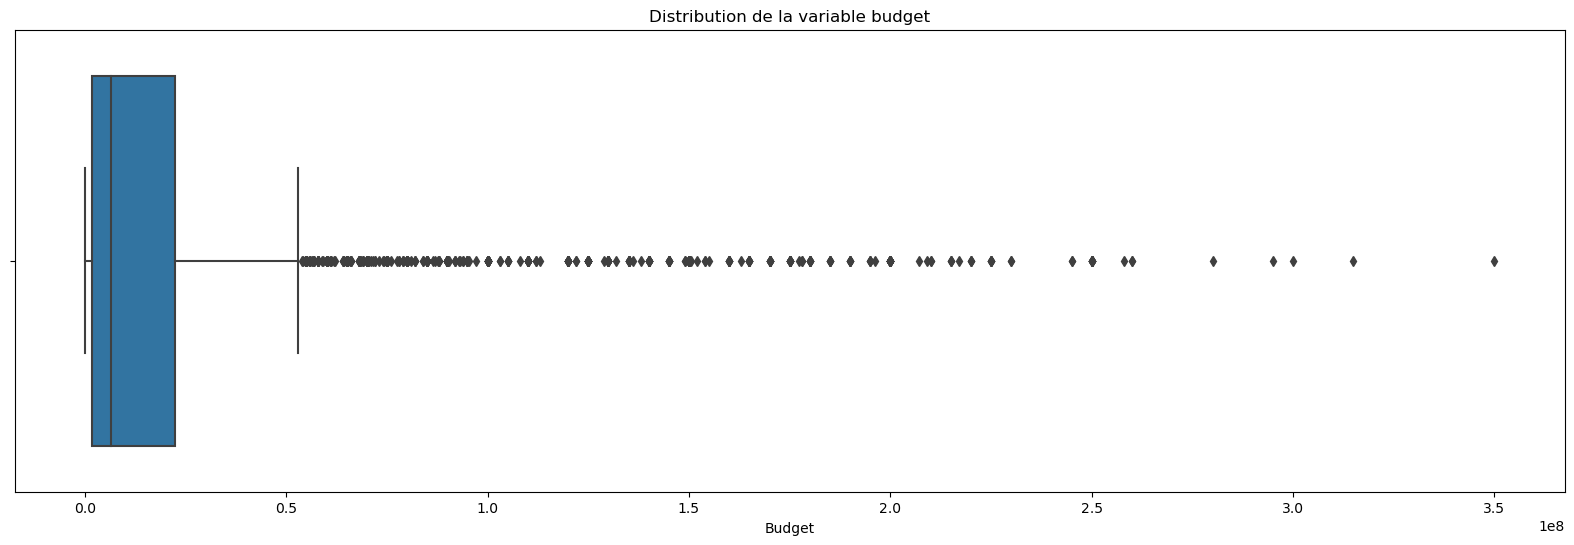

In [8]:
# Visualisation de la distribution de la première semaine France à l'aide d'un boxplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.boxplot(x = allocine_budget['budget_dollars']);
plt.title('Distribution de la variable budget')
plt.xlabel('Budget')

plt.show();

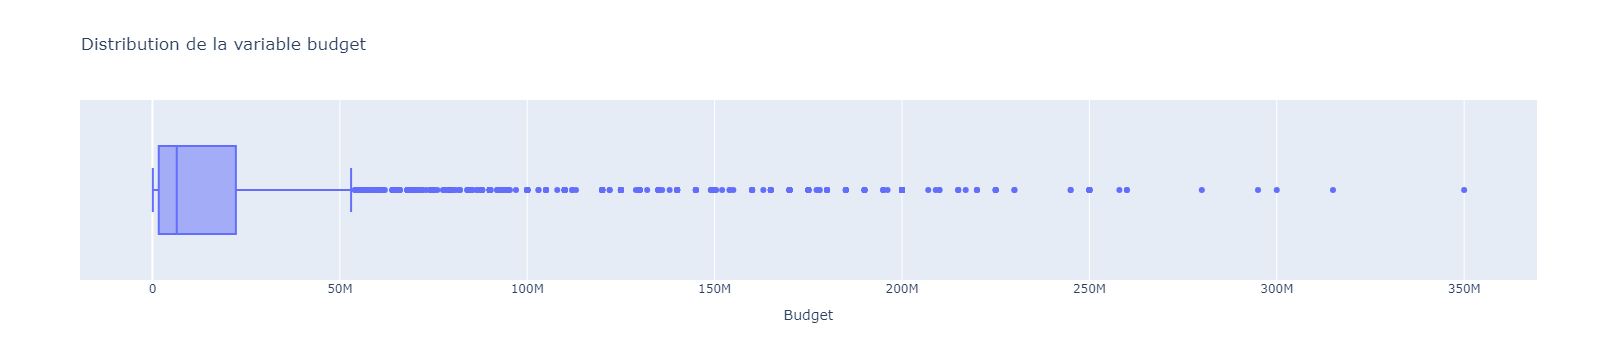

In [9]:
# Visualisation de la distribution de la première semaine France à l'aide d'un boxplot avec plotly

import plotly.express as px

# Création d'un boxplot horizontal pour la distribution du budget
fig = px.box(allocine_budget, x='budget_dollars', 
             labels={'budget_dollars': 'Budget'}, 
             title='Distribution de la variable budget')

# Affichage du graphique
fig.show()

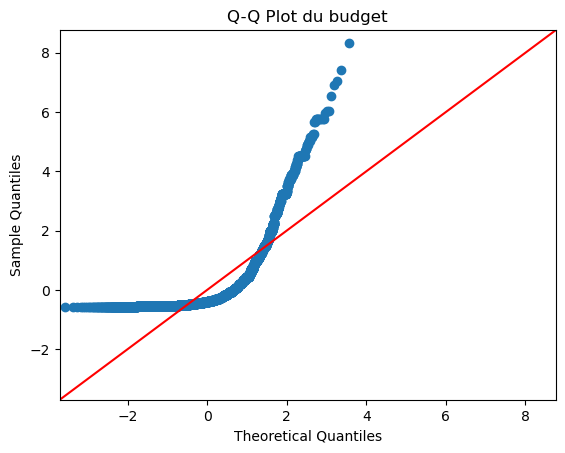

In [10]:
# Q-Q Plot de la variable budget

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Réaliser le Q-Q plot
sm.qqplot(allocine_budget['budget_dollars'], fit=True, line='45')

# Ajouter des titres et afficher le graphique
plt.title("Q-Q Plot du budget")
plt.show()

Corrélation de Pearson : 0.620674996768468


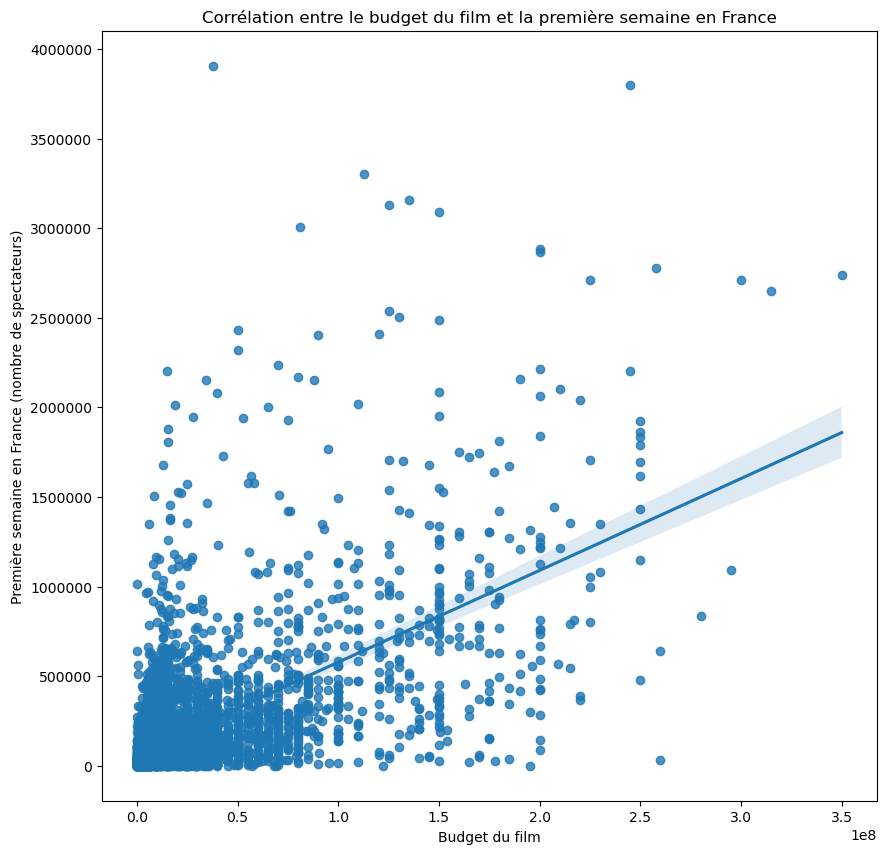

In [11]:
# Corrélation entre le budget et le nombre d'entrées en première semaine en France

import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la corrélation de Pearson
correlation = allocine_budget['premiere_semaine_france'].corr(allocine_budget['budget_dollars'])

# Afficher le coefficient de corrélation
print(f"Corrélation de Pearson : {correlation}")

# Créer une figure avec une taille personnalisée
plt.figure(figsize=(10, 10))

# Créer un scatter plot avec une ligne de régression
sns.regplot(x='budget_dollars', y='premiere_semaine_france', data=allocine_budget)

# Nom des axes
plt.xlabel('Budget du film')
plt.ylabel('Première semaine en France (nombre de spectateurs)')

# Titre du graphique
plt.title('Corrélation entre le budget du film et la première semaine en France')

# Personnaliser les étiquettes de l'axe y pour afficher les chiffres complets
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Ajouter des indications tous les 500000 sur l'axe y
from matplotlib.ticker import MultipleLocator
plt.gca().yaxis.set_major_locator(MultipleLocator(500000))

# Afficher le graphique
plt.show()

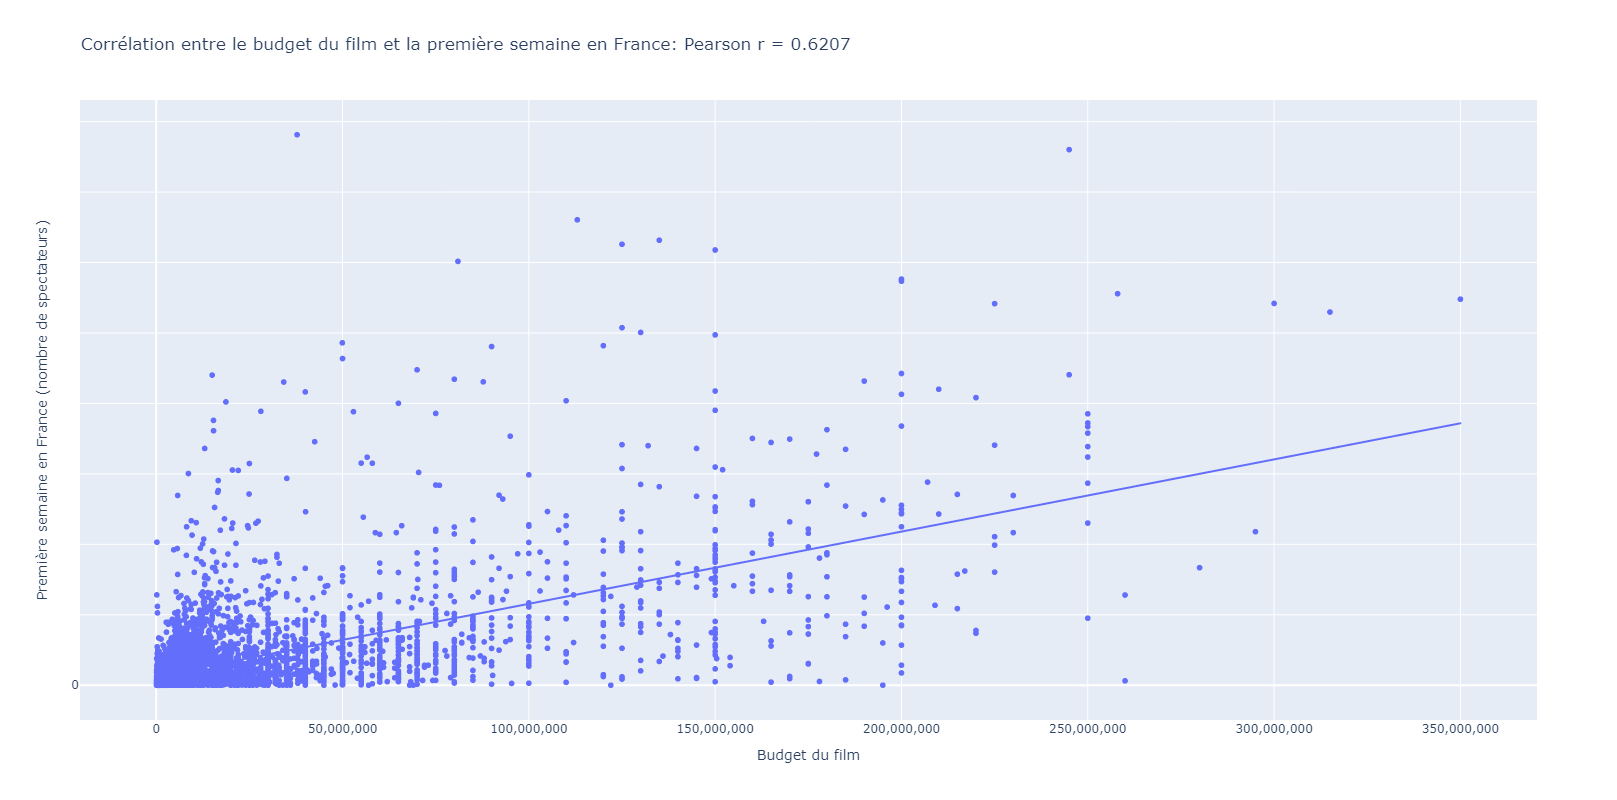

In [17]:
# Corrélation entre le budget et le nombre d'entrées en première semaine en France avec plotly

import plotly.express as px
import plotly.graph_objects as go

# Calculer la corrélation de Pearson
correlation = allocine_budget['premiere_semaine_france'].corr(allocine_budget['budget_dollars'])

# Créer un scatter plot avec une ligne de régression
fig = px.scatter(allocine_budget, x='budget_dollars', y='premiere_semaine_france', trendline='ols',
                 labels={
                     'budget_dollars': 'Budget du film',
                     'premiere_semaine_france': 'Première semaine en France (nombre de spectateurs)'
                 },
                 title=f'Corrélation entre le budget du film et la première semaine en France: Pearson r = {correlation:.4f}')

# Personnaliser les axes pour afficher les chiffres complets
fig.update_yaxes(ticklabelstep=500000, tickformat=',', title='Première semaine en France (nombre de spectateurs)')
fig.update_xaxes(tickformat=',', title='Budget du film')

# Ajuster la hauteur du graphique
fig.update_layout(height=800)

# Afficher le graphique
fig.show()

Corrélation de Pearson : 0.5448178615841928


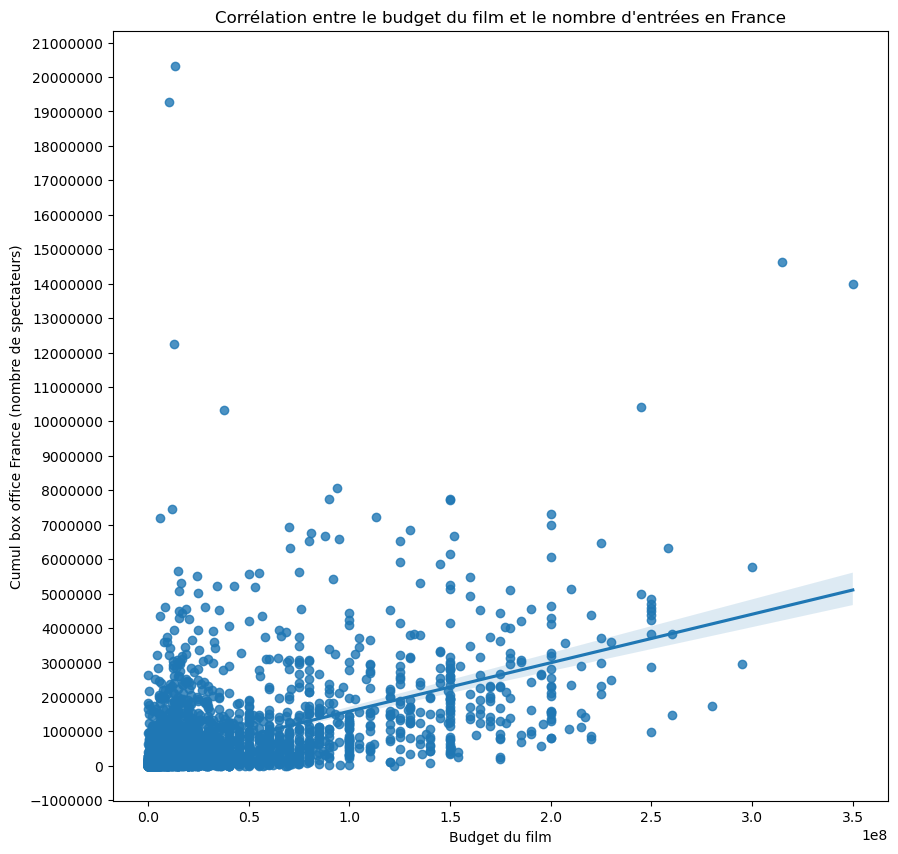

In [12]:
# Corrélation entre le budget et le nombre d'entrées cumulées en France

import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la corrélation de Pearson
correlation = allocine_budget['cumul_france'].corr(allocine_budget['budget_dollars'])

# Afficher le coefficient de corrélation
print(f"Corrélation de Pearson : {correlation}")

# Créer une figure avec une taille personnalisée
plt.figure(figsize=(10, 10))

# Créer un scatter plot avec une ligne de régression
sns.regplot(x='budget_dollars', y='cumul_france', data=allocine_budget)

# Nom des axes
plt.xlabel('Budget du film')
plt.ylabel('Cumul box office France (nombre de spectateurs)')

# Titre du graphique
plt.title("Corrélation entre le budget du film et le nombre d'entrées en France")

# Personnaliser les étiquettes de l'axe y pour afficher les chiffres complets
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Ajouter des indications tous les 1000000 sur l'axe y
from matplotlib.ticker import MultipleLocator
plt.gca().yaxis.set_major_locator(MultipleLocator(1000000))

# Afficher le graphique
plt.show()

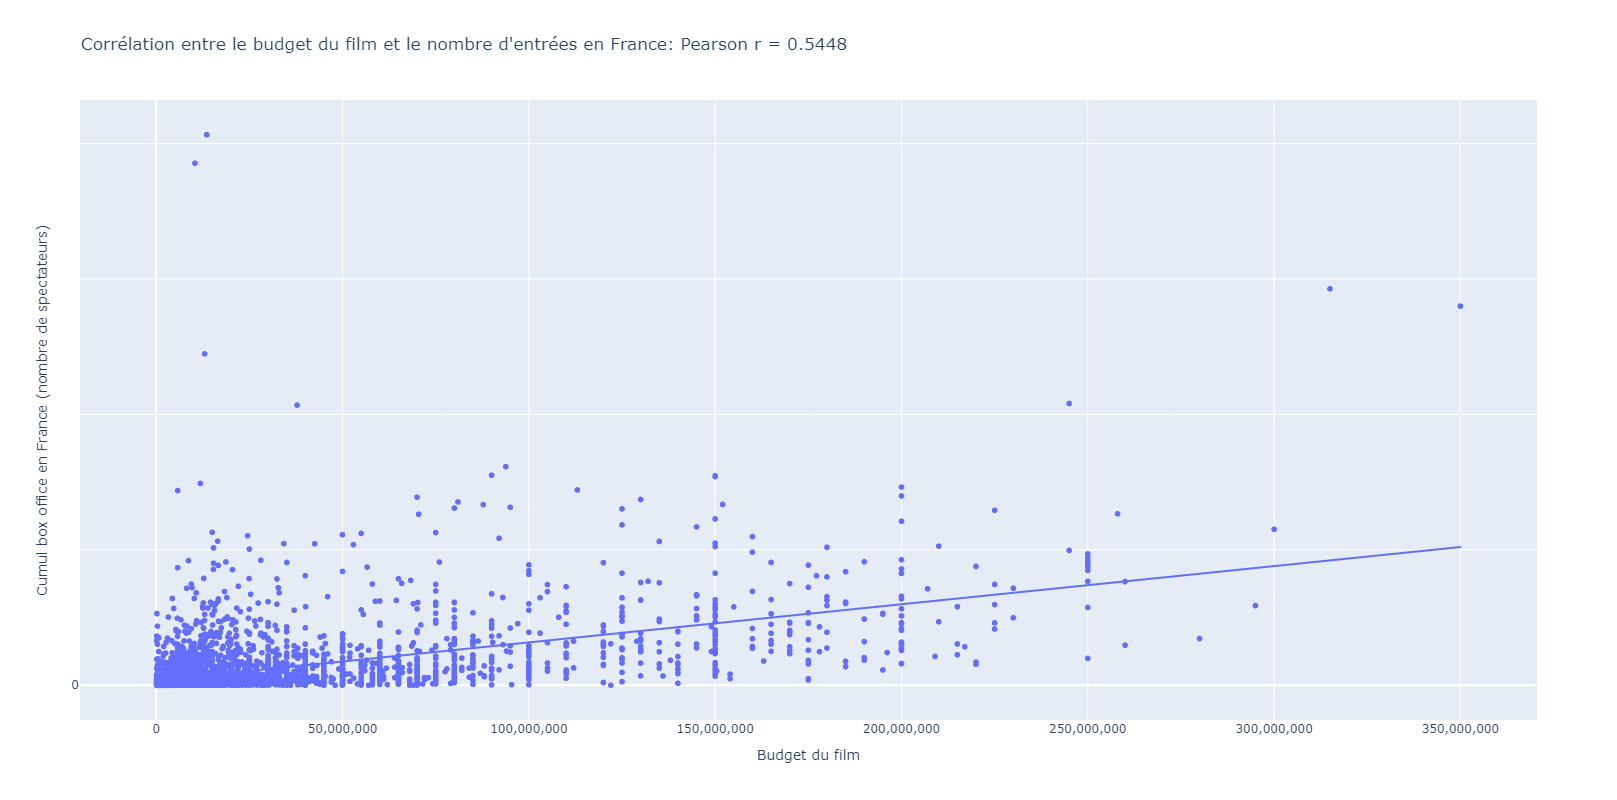

In [13]:
# Corrélation entre le budget et le nombre d'entrées cumulées en France avec plotly

import plotly.express as px
import plotly.graph_objects as go

# Calculer la corrélation de Pearson
correlation = allocine_budget['cumul_france'].corr(allocine_budget['budget_dollars'])

# Créer un scatter plot avec une ligne de régression
fig = px.scatter(allocine_budget, x='budget_dollars', y='cumul_france', trendline='ols',
                 labels={
                     'budget_dollars': 'Budget du film',
                     'cumul_france': 'Cumul box office en France (nombre de spectateurs)'  # Correction ici
                 },
                 title=f"Corrélation entre le budget du film et le nombre d'entrées en France: Pearson r = {correlation:.4f}")

# Personnaliser les axes pour afficher les chiffres complets
fig.update_yaxes(ticklabelstep=500000, tickformat=',', title='Cumul box office en France (nombre de spectateurs)')
fig.update_xaxes(tickformat=',', title='Budget du film')

# Ajuster la hauteur du graphique
fig.update_layout(height=800)

# Afficher le graphique
fig.show()